In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('train.csv')

In [2]:
df = df.rename(columns={'Unnamed: 0': 'id'})
df.head()

,id,carat,cut,color,clarity,depth,table,price,x,y,z
0,0,1.01,Very Good,E,SI2,60.0,60.0,4540,6.57,6.49,3.92
1,1,1.10,Premium,H,VS2,62.5,58.0,5729,6.59,6.54,4.10
2,2,1.50,Good,E,SI2,61.5,65.0,6300,7.21,7.17,4.42
3,3,1.53,Premium,E,SI1,61.3,59.0,12968,7.40,7.35,4.52
4,4,0.84,Fair,D,SI2,64.5,60.0,2167,5.92,5.84,3.79


In [3]:
df.columns.values

array(['id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'], dtype=object)

In [4]:
df.isnull().any()

id         False
carat      False
cut        False
color      False
clarity    False
depth      False
table      False
price      False
x          False
y          False
z          False
dtype: bool

As Above there is no null values in columns. 

In [5]:
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

cut        5
color      7
clarity    8
dtype: int64

In [6]:
df['cut'].unique()

array(['Very Good', 'Premium', 'Good', 'Fair', 'Ideal'], dtype=object)

In [7]:
df['color'].unique()

array(['E', 'H', 'D', 'F', 'G', 'I', 'J'], dtype=object)

In [8]:
df['clarity'].unique()

array(['SI2', 'VS2', 'SI1', 'VVS1', 'VS1', 'VVS2', 'IF', 'I1'],
      dtype=object)

In [9]:
df.describe()

,id,carat,depth,table,price,x,y,z
count,43154.000000,43154.000000,43154.000000,43154.000000,43154.000000,43154.000000,43154.000000,43154.000000
mean,21576.500000,0.799047,61.742925,57.459010,3946.777054,5.733798,5.737574,3.539338
std,12457.631095,0.475214,1.428410,2.227191,3998.657385,1.123004,1.150325,0.696203
min,0.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,10788.250000,0.400000,61.000000,56.000000,953.000000,4.710000,4.720000,2.910000
50%,21576.500000,0.700000,61.800000,57.000000,2406.500000,5.700000,5.710000,3.530000
75%,32364.750000,1.040000,62.500000,59.000000,5367.000000,6.540000,6.540000,4.040000
max,43153.000000,4.500000,79.000000,79.000000,18823.000000,10.230000,58.900000,8.060000


In [10]:
#check correlations
ext_data=df[['carat', 'depth', 'table','price', 'x', 'y', 'z']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,carat,depth,table,price,x,y,z
carat,1.000000,0.028054,0.179016,0.921273,0.975429,0.946710,0.968144
depth,0.028054,1.000000,-0.300327,-0.009905,-0.025632,-0.029838,0.096326
table,0.179016,-0.300327,1.000000,0.124965,0.194443,0.181657,0.152671
price,0.921273,-0.009905,0.124965,1.000000,0.884983,0.861052,0.874976
x,0.975429,-0.025632,0.194443,0.884983,1.000000,0.969037,0.985294
y,0.946710,-0.029838,0.181657,0.861052,0.969037,1.000000,0.961824
z,0.968144,0.096326,0.152671,0.874976,0.985294,0.961824,1.000000


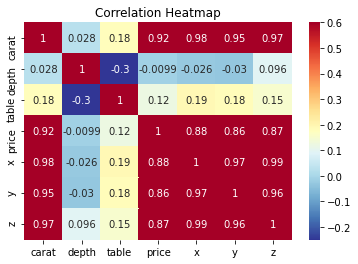

In [11]:
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap')
id = df['id']
df = df.drop(columns = ['id','x','y','z'])

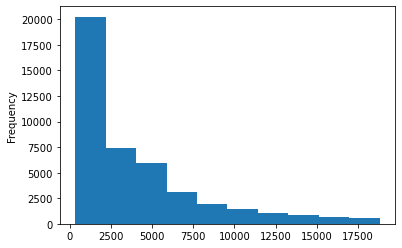

In [12]:
# Plot distribution
df['price'].plot.hist();

In [13]:
# Define a dictionary for encoding target variable
cut_enc_dict = {'Very Good':3, 'Premium':5, 'Good':2, 'Fair':0, 'Ideal':4}
color_enc_dict = {'E':5, 'H':2, 'D':6 , 'F':4, 'G':3, 'I':1, 'J':0}
clarity_enc_dict = {'SI2':1, 'VS2':3, 'SI1':2, 'VVS1':6, 'VS1':4, 'VVS2':5, 'IF':7, 'I1':0}
# Create the mapped values in a new column
df['cut'] = df['cut'].map(cut_enc_dict)
df['color'] = df['color'].map(color_enc_dict)
df['clarity'] = df['clarity'].map(clarity_enc_dict)
df.head()

,carat,cut,color,clarity,depth,table,price
0,1.01,3,5,1,60.0,60.0,4540
1,1.10,5,2,3,62.5,58.0,5729
2,1.50,2,5,1,61.5,65.0,6300
3,1.53,5,5,2,61.3,59.0,12968
4,0.84,0,6,1,64.5,60.0,2167


In [14]:
y = df['price']
# create training and testing vars
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.25)

In [15]:
# Drop the target variables from X_train and X_test
if 'price' in X_test:
    x_test = X_test.drop(columns = ['price'])
else:
    x_test = X_test.copy()

In [16]:
if 'price' in X_train:
    x_train = X_train.drop(columns = ['price'])
else:
    x_train = X_train.copy()

In [17]:
features = list(x_train.columns)
print(features)

['carat', 'cut', 'color', 'clarity', 'depth', 'table']


In [21]:
import h2o
from h2o.automl import H2OAutoML

In [20]:
# Start the H2O cluster (locally)
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM Zulu17.34+19-CA (build 17.0.3+7-LTS, mixed mode, sharing)
  Starting server from C:\Users\kllqz\anaconda3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\kllqz\AppData\Local\Temp\tmpehryml24
  JVM stdout: C:\Users\kllqz\AppData\Local\Temp\tmpehryml24\h2o_kllqz_started_from_python.out
  JVM stderr: C:\Users\kllqz\AppData\Local\Temp\tmpehryml24\h2o_kllqz_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,America/Toronto
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.1
H2O_cluster_version_age:,1 month and 15 days
H2O_cluster_name:,H2O_from_python_kllqz_2oz80p
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.928 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [22]:
# Run AutoML for 20 base models
train = h2o.H2OFrame(X_train)
test = h2o.H2OFrame(X_test)
x = ['carat', 'cut', 'color', 'clarity', 'depth', 'table']
y = "price"

aml = H2OAutoML(max_models=20, seed=102)
aml.train(x=x,y=y,training_frame = train)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
14:01:50.677: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,277.5036,4.7150493,277.1624,279.35565,277.7329,283.1071,270.16
mean_residual_deviance,291635.03,12330.503,293864.5,301660.1,284695.28,303816.9,274138.34
mse,291635.03,12330.503,293864.5,301660.1,284695.28,303816.9,274138.34
null_deviance,103907607000.0000000,4399483900.0000000,108540133000.0000000,103352312000.0000000,107990065000.0000000,98140103000.0000000,101515420000.0000000
r2,0.9818014,0.0011253,0.9824535,0.9813139,0.9826568,0.9800364,0.9825463
residual_deviance,1887449470.0000000,72478440.0000000,1903948030.0000000,1931227900.0000000,1872156030.0000000,1958707710.0000000,1771207810.0000000
rmse,539.93506,11.466442,542.0927,549.2359,533.5684,551.1959,523.5822
rmsle,0.1044947,0.0009165,0.1039648,0.1056232,0.1034402,0.1052657,0.1041795


In [23]:
# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_1_20221104_140150,540.052,291657,277.595,0.104538,291657
StackedEnsemble_BestOfFamily_1_AutoML_1_20221104_140150,542.663,294484,280.898,0.108618,294484
GBM_5_AutoML_1_20221104_140150,550.024,302527,289.677,nan,302527
GBM_3_AutoML_1_20221104_140150,557.798,311138,294.659,0.119565,311138
GBM_grid_1_AutoML_1_20221104_140150_model_1,560.648,314326,285.281,0.103772,314326
GBM_2_AutoML_1_20221104_140150,560.885,314593,305.721,nan,314593
GBM_1_AutoML_1_20221104_140150,567.022,321514,306.141,nan,321514
GBM_grid_1_AutoML_1_20221104_140150_model_4,569.745,324610,307.876,0.123899,324610
DRF_1_AutoML_1_20221104_140150,588.934,346843,306.114,0.12147,346843
GBM_4_AutoML_1_20221104_140150,592.38,350914,336.369,nan,350914


In [24]:
preds = aml.leader.predict(test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [25]:
aml.leader

,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,277.5036,4.7150493,277.1624,279.35565,277.7329,283.1071,270.16
mean_residual_deviance,291635.03,12330.503,293864.5,301660.1,284695.28,303816.9,274138.34
mse,291635.03,12330.503,293864.5,301660.1,284695.28,303816.9,274138.34
null_deviance,103907607000.0000000,4399483900.0000000,108540133000.0000000,103352312000.0000000,107990065000.0000000,98140103000.0000000,101515420000.0000000
r2,0.9818014,0.0011253,0.9824535,0.9813139,0.9826568,0.9800364,0.9825463
residual_deviance,1887449470.0000000,72478440.0000000,1903948030.0000000,1931227900.0000000,1872156030.0000000,1958707710.0000000,1771207810.0000000
rmse,539.93506,11.466442,542.0927,549.2359,533.5684,551.1959,523.5822
rmsle,0.1044947,0.0009165,0.1039648,0.1056232,0.1034402,0.1052657,0.1041795


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

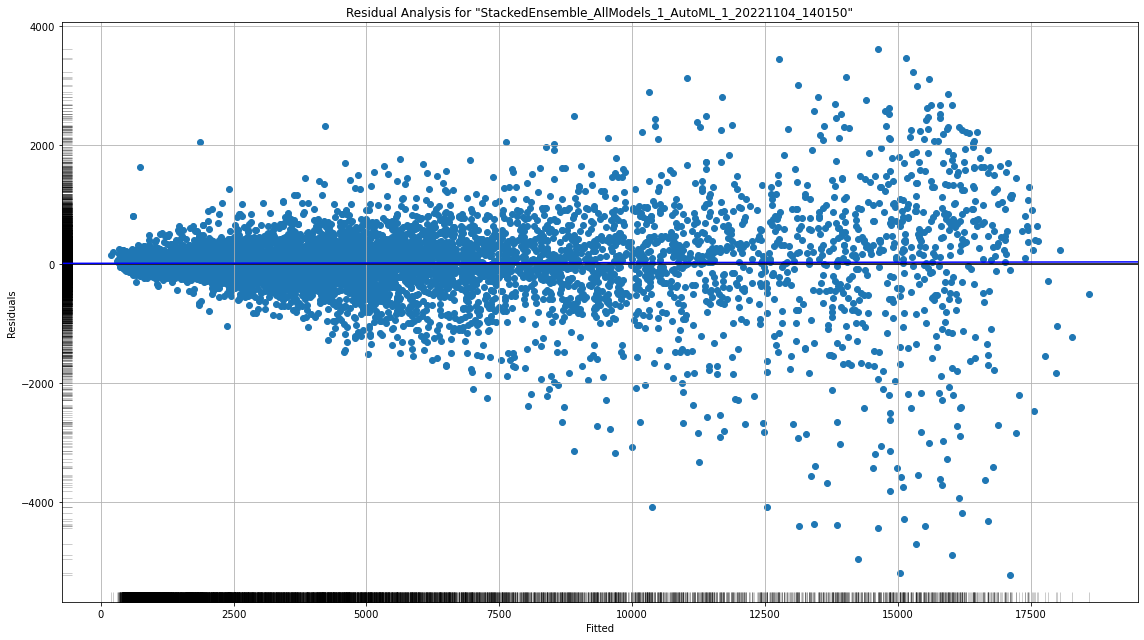

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

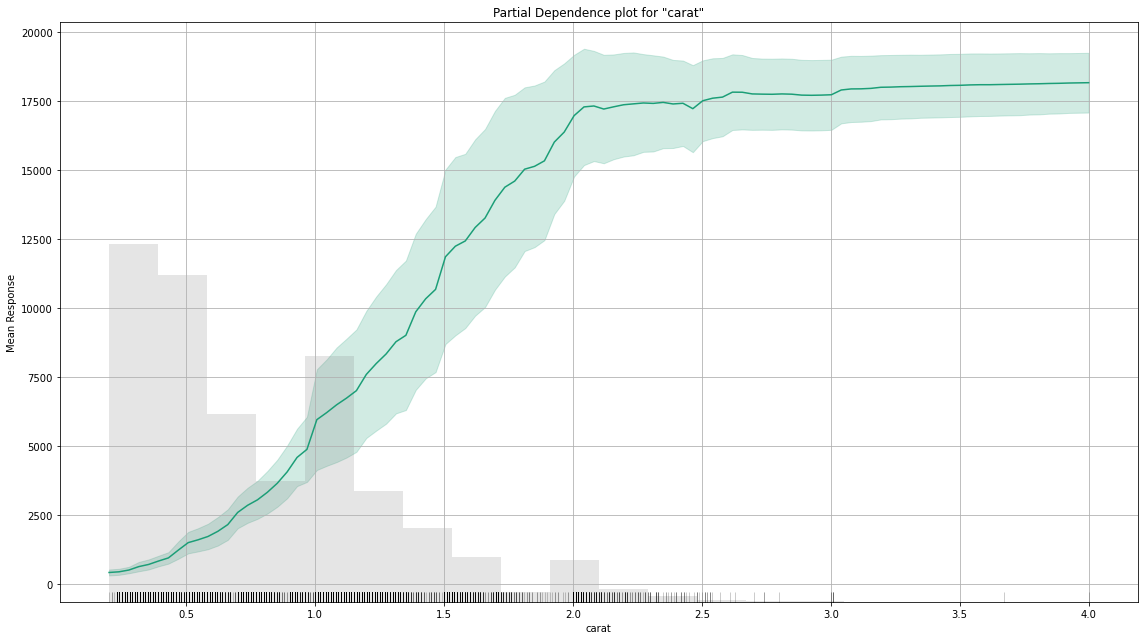

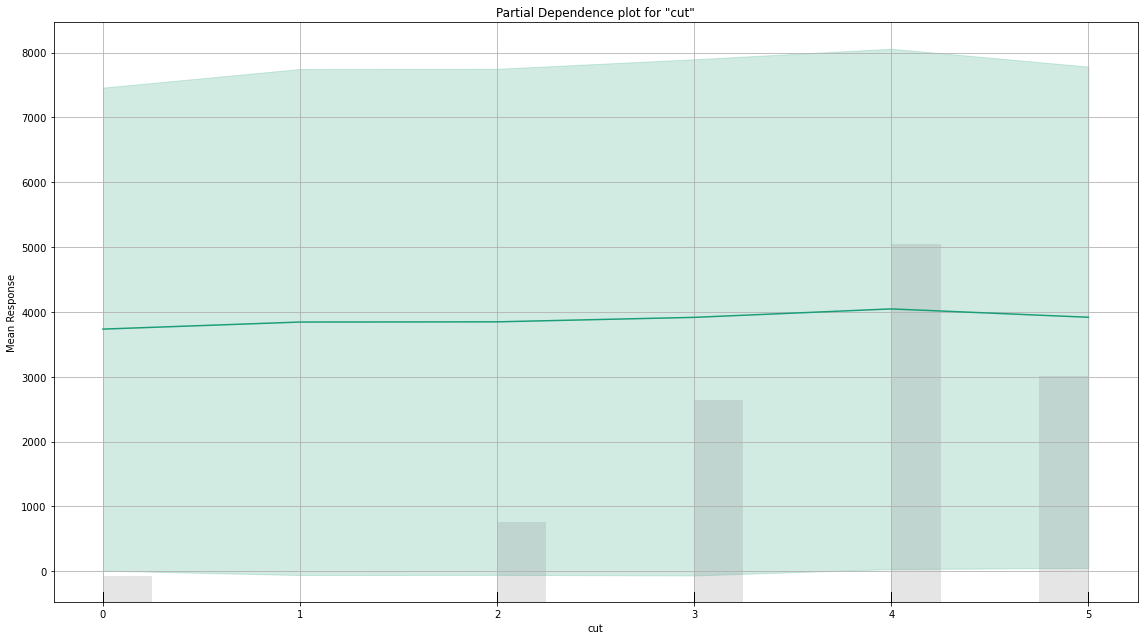

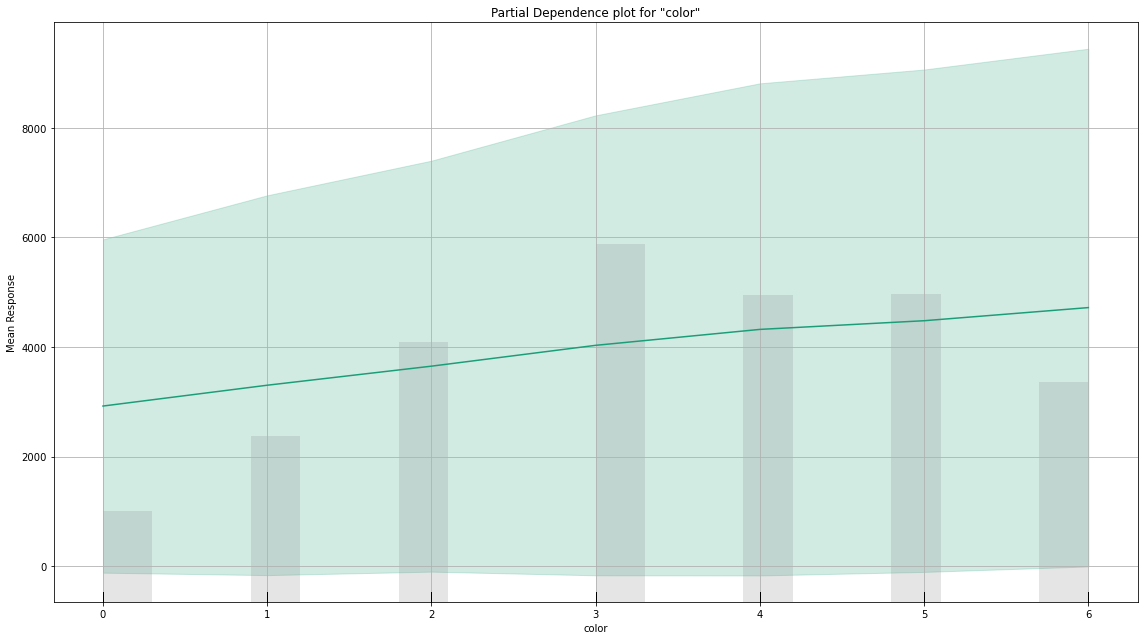

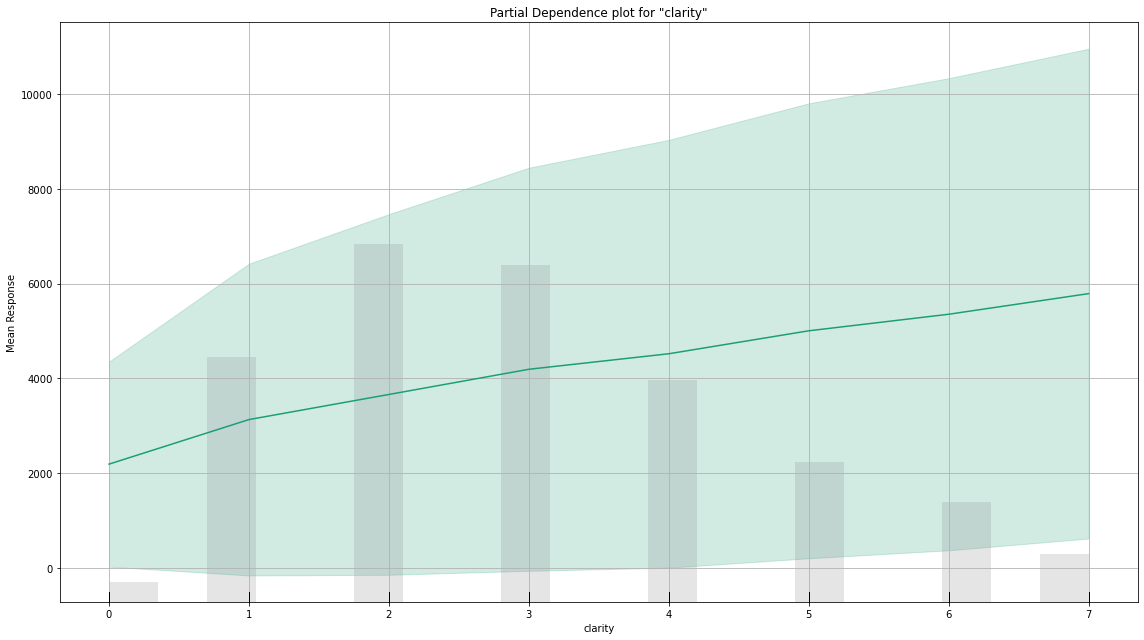

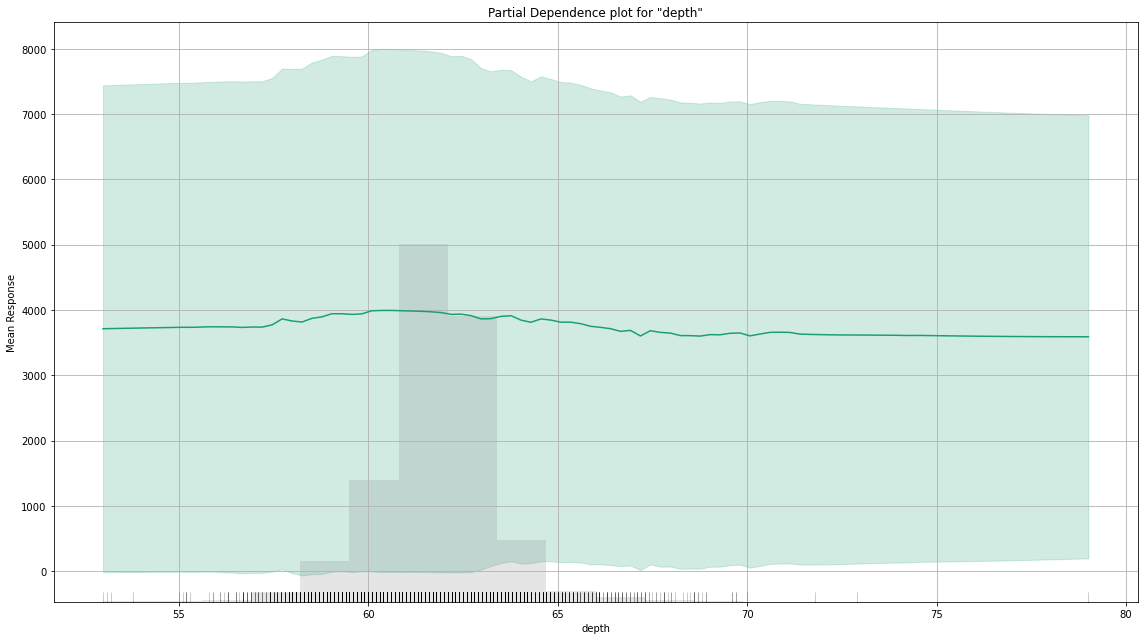

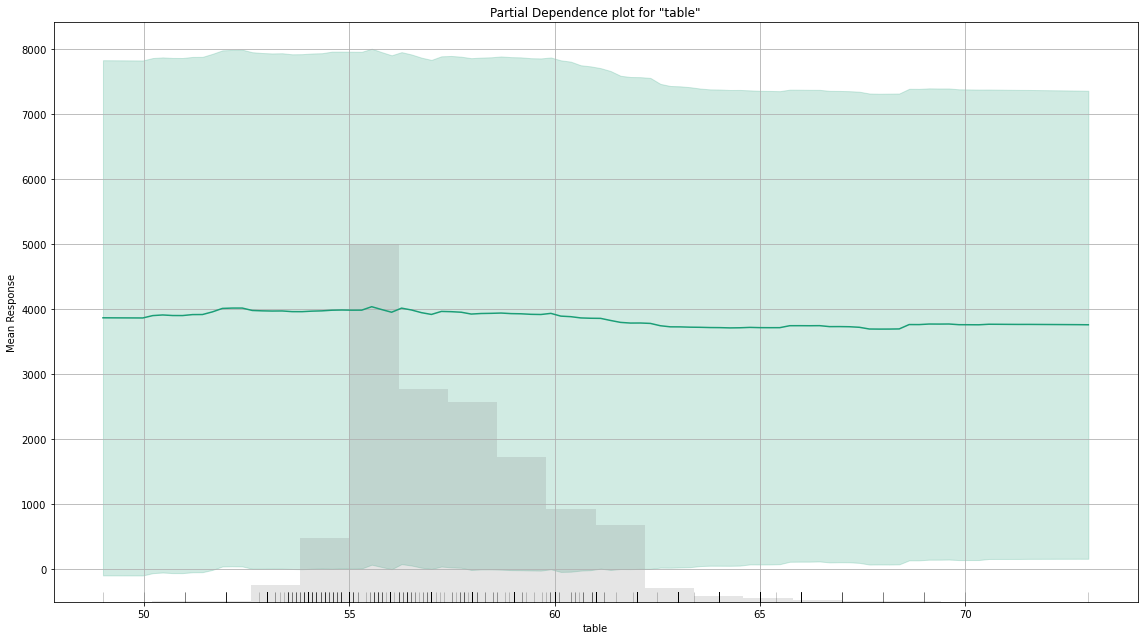

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

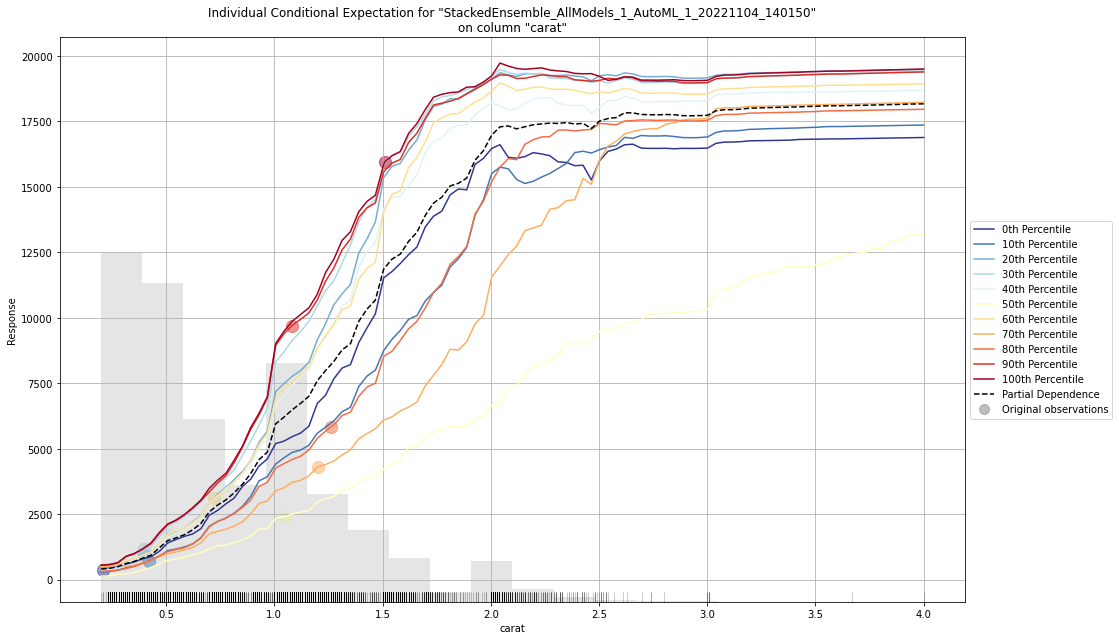

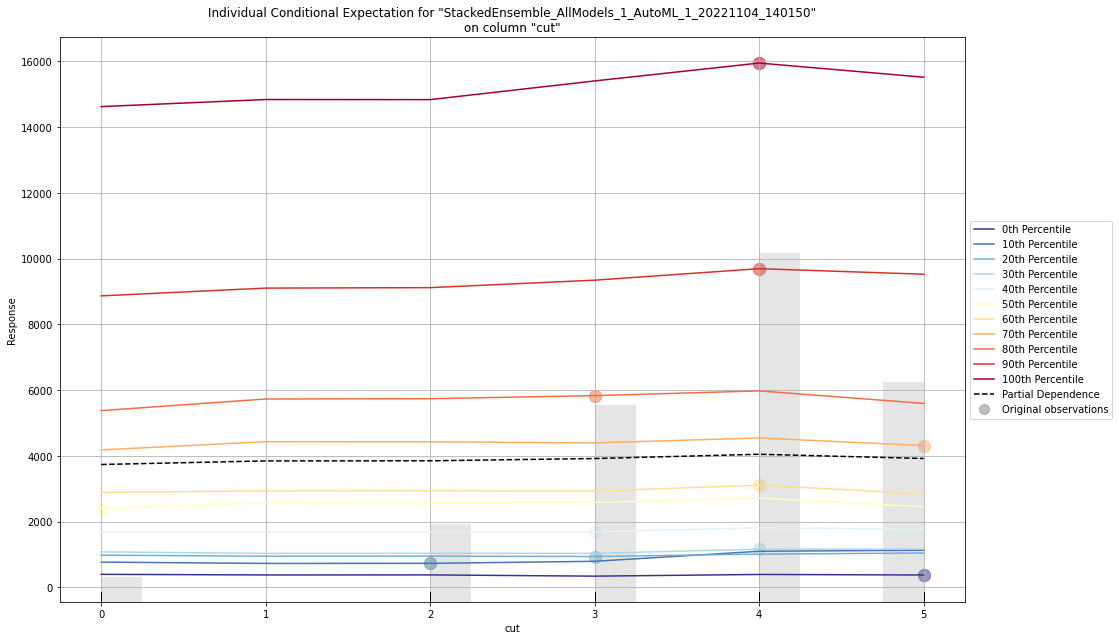

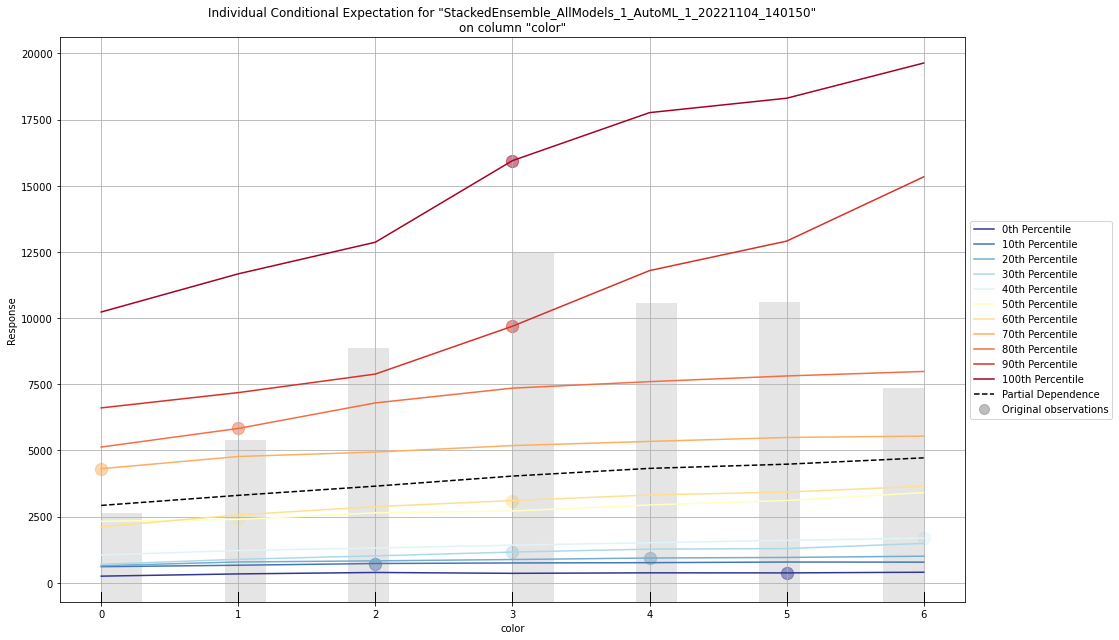

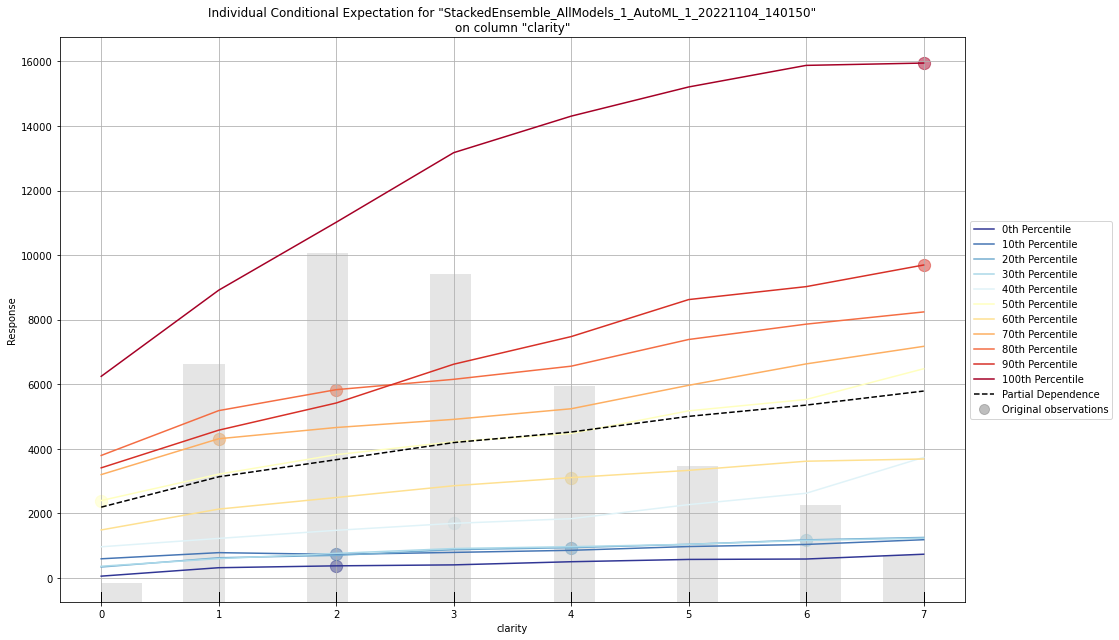

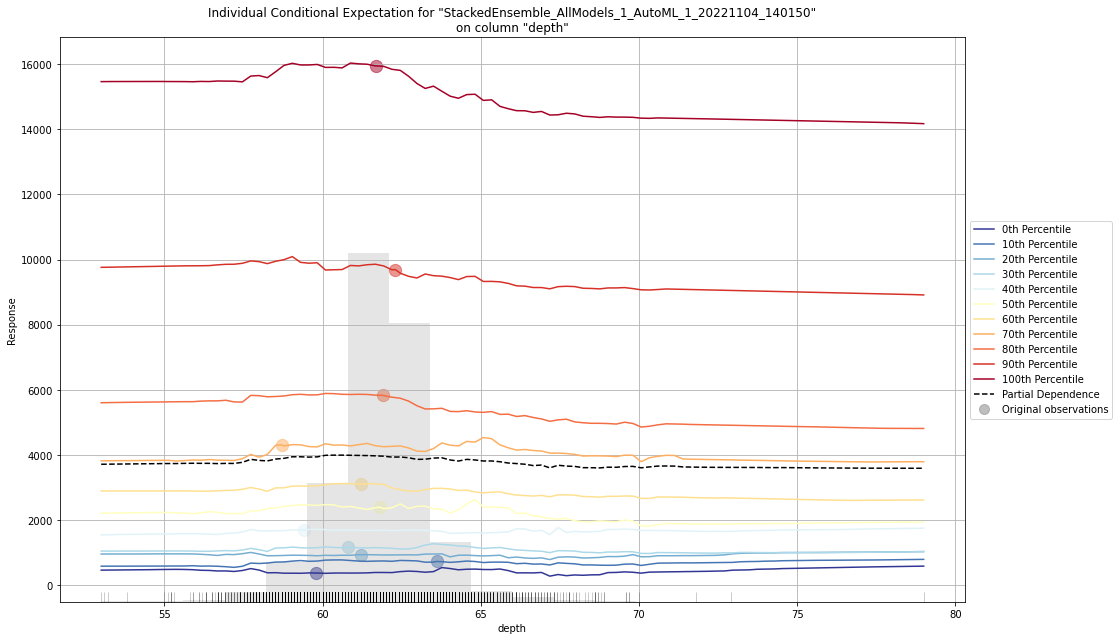

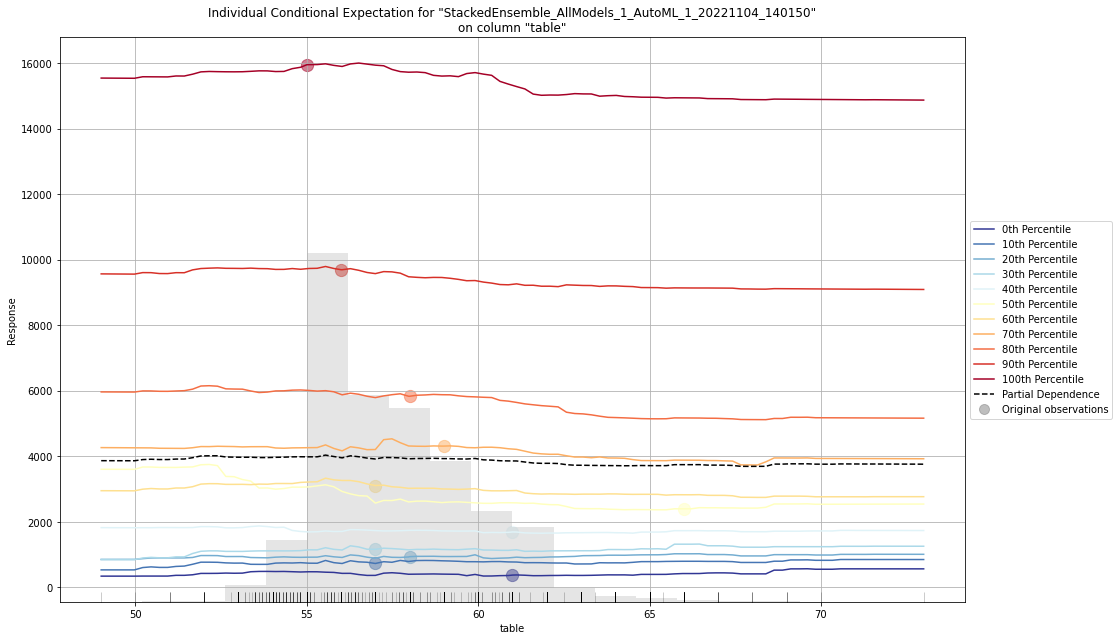

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

In [34]:
h2o.explain(aml.leader,test)

In [26]:
df=pd.read_csv('test.csv')
id = df['id']
df = df.drop(columns = ['id','x','y','z'])
df['cut'] = df['cut'].map(cut_enc_dict)
df['color'] = df['color'].map(color_enc_dict)
df['clarity'] = df['clarity'].map(clarity_enc_dict)
df.head()

,carat,cut,color,clarity,depth,table
0,0.24,4,3,6,62.1,56.0
1,1.21,3,4,3,62.9,54.0
2,0.50,0,5,2,61.7,68.0
3,0.50,4,6,1,62.8,56.0
4,1.55,4,5,1,62.3,55.0


In [27]:
submit = h2o.H2OFrame(df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [28]:
submitpreds = aml.leader.predict(submit)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [29]:
dfs = h2o.as_list(submitpreds)
dfs = dfs.rename(columns={'predict': 'price'})
dfs.to_csv('submission.csv')

In [131]:
# Scale each feature to 0-1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on the training data
scaler.fit(x_train)
# Transform both training and testing data
train = scaler.transform(x_train)
test = scaler.transform(x_test)
## return array

In [132]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='lbfgs', max_iter=3000)

# Train on the training data
model=log_reg.fit(train, y_train)
log_reg_pred = log_reg.predict_proba(test)

In [ ]:
y_pred = log_reg.predict(test)
## predict is for predicting class labels

In [ ]:
sub = log_reg.predict_proba(test)[:, 1]
submit = x_test[['id']]
submit['price'] = sub

submit